In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### Exploratory Data Analysis

In [2]:
data_set=pd.read_csv('data/loan_tap_logistic_regression.csv')

In [3]:
original_data_set=data_set.copy()

In [4]:
data_set.shape

(396030, 27)

In [5]:
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [6]:
data_set.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


#### Find Null Values

In [7]:
data_set.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

#### Check Duplicates

In [8]:
data_set[data_set.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [9]:
#data_set[data_set['revol_util'].n#unique()]
data_set['revol_util'].value_counts(sort='Ascending')

revol_util
0.00      2213
53.00      752
60.00      739
61.00      734
55.00      730
          ... 
146.10       1
109.30       1
108.10       1
115.30       1
37.63        1
Name: count, Length: 1226, dtype: int64

#### Handle Null Values


In [10]:
data_set.loc[data_set['emp_title'].isna(),'emp_title']="Unavailable"
data_set.loc[data_set['title'].isna(),'title']="Unavailable"
data_set.loc[data_set['mort_acc'].isna(),'mort_acc']=0.0
data_set.loc[data_set['pub_rec_bankruptcies'].isna(),'pub_rec_bankruptcies']=0.0
data_set['emp_length'] = data_set['emp_length'].fillna('< 1 year')
data_set.loc[data_set['revol_util'].isna(),'revol_util']=0.0

In [11]:
data_set.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [12]:
data_set.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,Verified,Sep-2015,Fully Paid,debt_consolidation,Debt consolidation,16.31,Jan-2005,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,Sep-2015,Fully Paid,home_improvement,Home improvement,1.36,Aug-2005,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,Not Verified,Sep-2012,Fully Paid,credit_card,No More Credit Cards,26.87,Sep-1994,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,12.52,Jun-1994,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,Verified,Apr-2012,Fully Paid,debt_consolidation,Debt Consolidation,23.69,Dec-1997,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813"


In [13]:
data_set['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [14]:
data_set['purpose'].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

#### Split Month and year for Issue Date and Earliest Credit Date

In [15]:
# Split Issue date into Month and year
def SplitDate(date):
    month,year = str.split(date,'-')
    return pd.Series([month, year])

In [16]:
data_set[['issue_month','issue_year']] = data_set['issue_d'].apply(SplitDate)
data_set[['earliest_cr_line_month','earliest_cr_line_year']] = data_set['earliest_cr_line'].apply(SplitDate) 

In [17]:
data_set.drop(['issue_d','earliest_cr_line'],inplace=True,axis=1)

In [18]:
data_set.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Fully Paid,vacation,Vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",Jan,2015,Jun,1990
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",Jan,2015,Jul,2004
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",Jan,2015,Aug,2007
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Fully Paid,credit_card,Credit card refinancing,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",Nov,2014,Sep,2006
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Charged Off,credit_card,Credit Card Refinance,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",Apr,2013,Mar,1999
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,Verified,Fully Paid,debt_consolidation,Debt consolidation,16.31,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...,Sep,2015,Jan,2005
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,Fully Paid,home_improvement,Home improvement,1.36,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ...",Sep,2015,Aug,2005
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,Not Verified,Fully Paid,credit_card,No More Credit Cards,26.87,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723,Sep,2012,Sep,1994
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,Verified,Fully Paid,debt_consolidation,Debt consolidation,12.52,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690,Oct,2014,Jun,1994
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,Verified,Fully Paid,debt_consolidation,Debt Consolidation,23.69,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813",Apr,2012,Dec,1997


In [19]:
data_set['term'].value_counts()

term
36 months    302005
60 months     94025
Name: count, dtype: int64

#### Term Month - Number of Term Months

In [20]:
data_set.rename(columns={"term": "term_month_num"},inplace=True)

In [21]:
data_set.head(10)

,loan_amnt,term_month_num,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Fully Paid,vacation,Vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",Jan,2015,Jun,1990
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",Jan,2015,Jul,2004
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",Jan,2015,Aug,2007
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Fully Paid,credit_card,Credit card refinancing,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",Nov,2014,Sep,2006
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Charged Off,credit_card,Credit Card Refinance,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",Apr,2013,Mar,1999
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,Verified,Fully Paid,debt_consolidation,Debt consolidation,16.31,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...,Sep,2015,Jan,2005
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,Fully Paid,home_improvement,Home improvement,1.36,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ...",Sep,2015,Aug,2005
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,Not Verified,Fully Paid,credit_card,No More Credit Cards,26.87,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723,Sep,2012,Sep,1994
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,Verified,Fully Paid,debt_consolidation,Debt consolidation,12.52,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690,Oct,2014,Jun,1994
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,Verified,Fully Paid,debt_consolidation,Debt Consolidation,23.69,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813",Apr,2012,Dec,1997


In [22]:
split_col=data_set['term_month_num'].str.split(' ')

In [23]:
data_set['term_months']=split_col.str[1]

In [24]:
data_set.drop(columns='term_month_num',inplace=True)

In [25]:
data_set.head(10)

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year,term_months
0,10000.0,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Fully Paid,vacation,Vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",Jan,2015,Jun,1990,36
1,8000.0,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",Jan,2015,Jul,2004,36
2,15600.0,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",Jan,2015,Aug,2007,36
3,7200.0,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Fully Paid,credit_card,Credit card refinancing,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",Nov,2014,Sep,2006,36
4,24375.0,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Charged Off,credit_card,Credit Card Refinance,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",Apr,2013,Mar,1999,60
5,20000.0,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,Verified,Fully Paid,debt_consolidation,Debt consolidation,16.31,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...,Sep,2015,Jan,2005,36
6,18000.0,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,Source Verified,Fully Paid,home_improvement,Home improvement,1.36,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ...",Sep,2015,Aug,2005,36
7,13000.0,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,Not Verified,Fully Paid,credit_card,No More Credit Cards,26.87,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723,Sep,2012,Sep,1994,36
8,18900.0,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,Verified,Fully Paid,debt_consolidation,Debt consolidation,12.52,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690,Oct,2014,Jun,1994,60
9,26300.0,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,Verified,Fully Paid,debt_consolidation,Debt Consolidation,23.69,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813",Apr,2012,Dec,1997,36


In [26]:
print(data_set['pub_rec_bankruptcies'].value_counts())
print(data_set['mort_acc'].value_counts())
print(data_set['pub_rec'].value_counts())

pub_rec_bankruptcies
0.0    350915
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64
mort_acc
0.0     177572
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
26.0         2
32.0         2
31.0         2
23.0         2
34.0         1
28.0         1
30.0         1
Name: count, dtype: int64
pub_rec
0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0

### Feature Engineering

#### For Public records, mortgage accounts and public record bankruptcies - Give values 1 or 0

In [27]:
data_set['pub_rec'] = [1 if i > 1 else 0 for i in data_set['pub_rec']]
data_set['mort_acc'] = [1 if i > 1 else 0 for i in data_set['mort_acc']]
data_set['pub_rec_bankruptcies'] = [1 if i > 1 else 0 for i in data_set['pub_rec_bankruptcies']]

data_set.head(5)

In [28]:
data_set['employee_years'] = data_set['emp_length'].str.extract('(\d+)')
data_set.drop(columns='emp_length',inplace=True)
data_set.head(5)

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year,term_months,employee_years
0,10000.0,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,Fully Paid,vacation,Vacation,26.24,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",Jan,2015,Jun,1990,36,10
1,8000.0,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.05,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",Jan,2015,Jul,2004,36,4
2,15600.0,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.79,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",Jan,2015,Aug,2007,36,1
3,7200.0,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,Fully Paid,credit_card,Credit card refinancing,2.60,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,"823 Reid Ford\r\nDelacruzside, MA 00813",Nov,2014,Sep,2006,36,6
4,24375.0,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,Charged Off,credit_card,Credit Card Refinance,33.95,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,0,0,"679 Luna Roads\r\nGreggshire, VA 11650",Apr,2013,Mar,1999,60,9


#### Q1. What percentage of customers have fully paid their Loan Amount?

In [29]:
data_set['loan_status'].value_counts(normalize=True).to_frame()

,proportion
loan_status,
Fully Paid,0.803871
Charged Off,0.196129


### Graphical Analysis

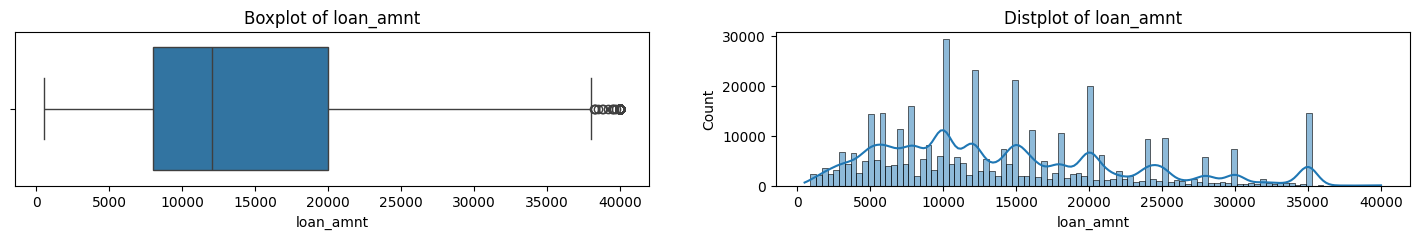

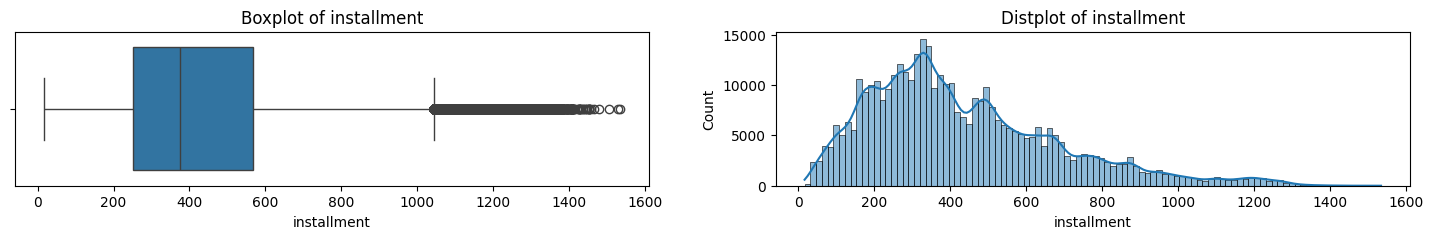

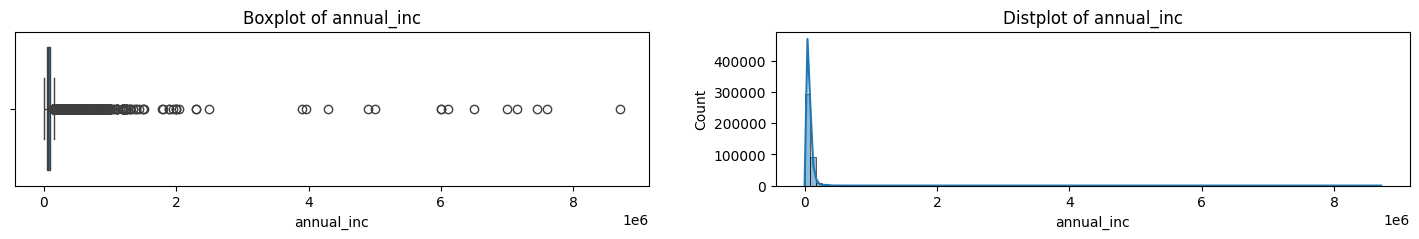

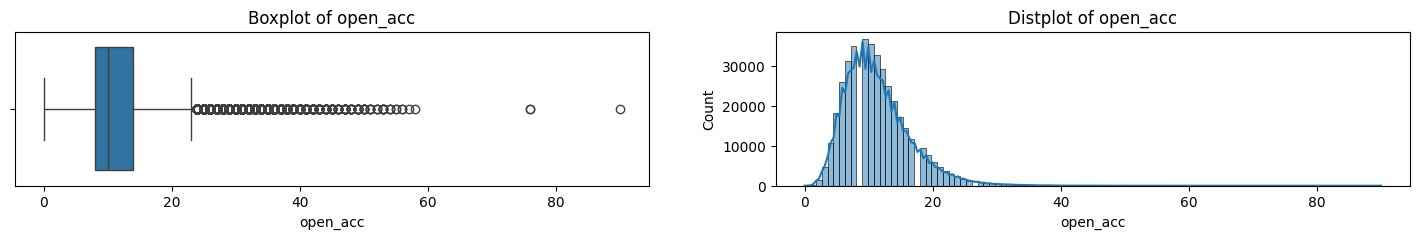

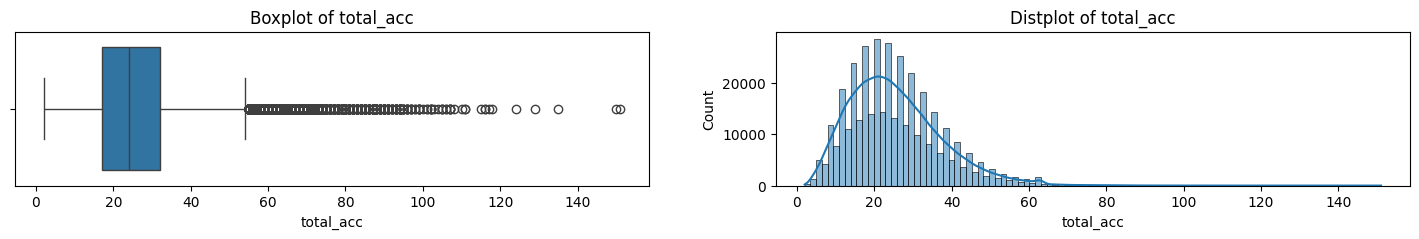

In [30]:
plot_colum_list = ['loan_amnt','installment','annual_inc','open_acc','total_acc']
for col in plot_colum_list:
    plt.figure(figsize=(18,2))
    plt.subplot(121)
    plt.title(f'Boxplot of {col}',loc='center')
    sns.boxplot(data=data_set[col],orient='h')
    plt.subplot(122)
    plt.title(f'Distplot of {col}',loc='center')
    sns.histplot(data=data_set[col],kde=0.3,bins=100)

In [31]:
## Split address into State and Zip code
data_set[['state','zipcode']] = data_set['address'].str.extract(r'([A-Z]{2}) (\d{5})')
data_set.drop(['address'], axis=1, inplace=True)

In [32]:
data_set.head(5)

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year,term_months,employee_years,state,zipcode
0,10000.0,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,Fully Paid,vacation,Vacation,26.24,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,Jan,2015,Jun,1990,36,10,OK,22690
1,8000.0,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.05,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,Jan,2015,Jul,2004,36,4,SD,05113
2,15600.0,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.79,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,Jan,2015,Aug,2007,36,1,WV,05113
3,7200.0,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,Fully Paid,credit_card,Credit card refinancing,2.60,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,Nov,2014,Sep,2006,36,6,MA,00813
4,24375.0,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,Charged Off,credit_card,Credit Card Refinance,33.95,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,0,0,Apr,2013,Mar,1999,60,9,VA,11650


#### List of Categorical columns & Numerical columns

In [33]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   int_rate                396030 non-null  float64
 2   installment             396030 non-null  float64
 3   grade                   396030 non-null  object 
 4   sub_grade               396030 non-null  object 
 5   emp_title               396030 non-null  object 
 6   home_ownership          396030 non-null  object 
 7   annual_inc              396030 non-null  float64
 8   verification_status     396030 non-null  object 
 9   loan_status             396030 non-null  object 
 10  purpose                 396030 non-null  object 
 11  title                   396030 non-null  object 
 12  dti                     396030 non-null  float64
 13  open_acc                396030 non-null  float64
 14  pub_rec             

In [37]:
convert_cols=['zipcode','employee_years','issue_year',]
for col in convert_cols:
    data_set[col]=data_set[col].astype('float')

In [38]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   int_rate                396030 non-null  float64
 2   installment             396030 non-null  float64
 3   grade                   396030 non-null  object 
 4   sub_grade               396030 non-null  object 
 5   emp_title               396030 non-null  object 
 6   home_ownership          396030 non-null  object 
 7   annual_inc              396030 non-null  float64
 8   verification_status     396030 non-null  object 
 9   loan_status             396030 non-null  object 
 10  purpose                 396030 non-null  object 
 11  title                   396030 non-null  object 
 12  dti                     396030 non-null  float64
 13  open_acc                396030 non-null  float64
 14  pub_rec             

In [43]:
category_column_list=[]
numerical_column_list=[]
for col in data_set.columns:
    if data_set[col].dtypes == 'object':
        category_column_list.append(col)
    else:
        numerical_column_list.append(col)
print(category_column_list)
print(numerical_column_list)

['grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'title', 'initial_list_status', 'application_type', 'issue_month', 'earliest_cr_line_month', 'earliest_cr_line_year', 'term_months', 'state']
['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'issue_year', 'employee_years', 'zipcode']


In [44]:
numerical_column_list.skew()

AttributeError: 'list' object has no attribute 'skew'

In [45]:
# List of categorical columns dataset
cat_cols = data_set.select_dtypes(include='object')

# List of numerical columns dataset
num_cols = data_set.select_dtypes(exclude='object')

In [46]:
num_cols

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issue_year,employee_years,zipcode
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0,36369.0,41.8,25.0,0,0,2015.0,10.0,22690.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0,20131.0,53.3,27.0,1,0,2015.0,4.0,5113.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0,11987.0,92.2,26.0,0,0,2015.0,1.0,5113.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0,5472.0,21.5,13.0,0,0,2014.0,6.0,813.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0,24584.0,69.8,43.0,0,0,2013.0,9.0,11650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0,1990.0,34.3,23.0,0,0,2015.0,2.0,30723.0
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0,43263.0,95.7,8.0,0,0,2015.0,5.0,5113.0
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0,32704.0,66.9,23.0,0,0,2013.0,10.0,70466.0
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,0,15704.0,53.8,20.0,1,0,2012.0,10.0,29597.0


In [47]:
cat_cols

,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type,issue_month,earliest_cr_line_month,earliest_cr_line_year,term_months,state
0,B,B4,Marketing,RENT,Not Verified,Fully Paid,vacation,Vacation,w,INDIVIDUAL,Jan,Jun,1990,36,OK
1,B,B5,Credit analyst,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,f,INDIVIDUAL,Jan,Jul,2004,36,SD
2,B,B3,Statistician,RENT,Source Verified,Fully Paid,credit_card,Credit card refinancing,f,INDIVIDUAL,Jan,Aug,2007,36,WV
3,A,A2,Client Advocate,RENT,Not Verified,Fully Paid,credit_card,Credit card refinancing,f,INDIVIDUAL,Nov,Sep,2006,36,MA
4,C,C5,Destiny Management Inc.,MORTGAGE,Verified,Charged Off,credit_card,Credit Card Refinance,f,INDIVIDUAL,Apr,Mar,1999,60,VA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,B,B4,licensed bankere,RENT,Source Verified,Fully Paid,debt_consolidation,Debt consolidation,w,INDIVIDUAL,Oct,Nov,2004,60,DC
396026,C,C1,Agent,MORTGAGE,Source Verified,Fully Paid,debt_consolidation,Debt consolidation,f,INDIVIDUAL,Feb,Feb,2006,36,LA
396027,B,B1,City Carrier,RENT,Verified,Fully Paid,debt_consolidation,pay off credit cards,f,INDIVIDUAL,Oct,Mar,1997,36,NY
396028,C,C2,"Gracon Services, Inc",MORTGAGE,Verified,Fully Paid,debt_consolidation,Loanforpayoff,f,INDIVIDUAL,Aug,Nov,1990,60,FL


In [48]:
num_cols.skew()

loan_amnt                 0.777285
int_rate                  0.420669
installment               0.983598
annual_inc               41.042725
dti                     431.051225
open_acc                  1.213019
pub_rec                   6.812303
revol_bal                11.727515
revol_util               -0.074238
total_acc                 0.864328
mort_acc                  0.412225
pub_rec_bankruptcies     12.936099
issue_year               -0.773702
employee_years           -0.053493
zipcode                   0.588196
dtype: float64

#### Interpreting Skewness Values
Zero Skewness (Skewness ≈ 0):
The data distribution is symmetric.
The left and right sides of the distribution are mirror images.
Examples: Normally distributed data.

Positive Skewness (Skewness > 0):
The distribution is right-skewed or positively skewed.
The right tail (higher values) is longer or fatter than the left tail.
Most of the data points are concentrated on the left side of the distribution.
Examples: Income distribution in many countries (a few very high incomes pull the mean to the right).

Negative Skewness (Skewness < 0):
The distribution is left-skewed or negatively skewed.
The left tail (lower values) is longer or fatter than the right tail.
Most of the data points are concentrated on the right side of the distribution.
Examples: Age of retirement (most people retire at a certain age, with fewer retiring much earlier).

Here the features are right skewed

#### Various Count Plots

<Axes: xlabel='loan_status', ylabel='count'>

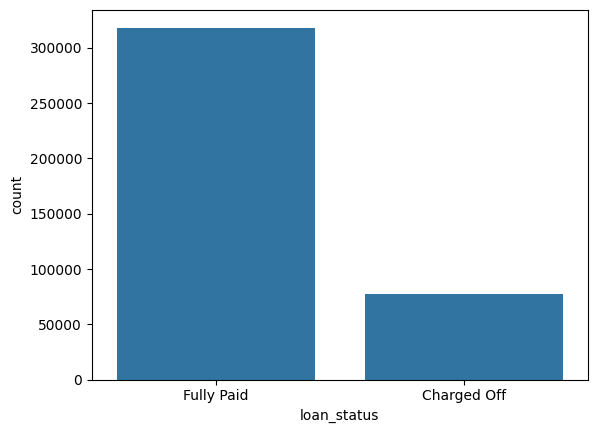

In [55]:

sns.countplot(data_set,x='loan_status')